In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
import h5py

In [2]:
os.chdir('/content/drive/My Drive/github/NNanobody/')

In [3]:
def load_all_models():
  model_list = {}
  for dataset in ['Full Regression','Hold out Regression','Hold out Top 4%']:
    for loaded_model in ['seq_32x1_16', 'seq_64x1_16','seq_32x2_16','seq_32_32','seq_32x1_16_filt3','seq_emb_32x1_16']:
      model = keras.models.load_model(f'./weights/regression/{dataset}/{loaded_model}')
      model_list[dataset + ' ' + loaded_model] = model

  return model_list

In [4]:
models = load_all_models()

In [5]:
fi = h5py.File('./data/regression/Test set Regression/test.h5.batch1', 'r')
X_train = np.asarray(fi['data'])[:10000]
Y_train = np.asarray(fi['label'])[:10000]

X_test = np.asarray(fi['data'])[-5000:]
Y_test = np.asarray(fi['label'])[-5000:]

In [6]:
def get_stacked_prediction(model_list, dataset):
  output = []
  for idx, model in enumerate(model_list.values()):
    cur_pred = model.predict(dataset).flatten()
    output.append([])
    output[idx].append(cur_pred)
  
  output = np.array(output)
  return output.reshape(output.shape[0], output.shape[2]).T

In [7]:
output = get_stacked_prediction(models, X_train)
stacked_dataset = pd.DataFrame(columns=list(models.keys()), data=output)

In [8]:
stacked_dataset

,Full Regression seq_32x1_16,Full Regression seq_64x1_16,Full Regression seq_32x2_16,Full Regression seq_32_32,Full Regression seq_32x1_16_filt3,Full Regression seq_emb_32x1_16,Hold out Regression seq_32x1_16,Hold out Regression seq_64x1_16,Hold out Regression seq_32x2_16,Hold out Regression seq_32_32,Hold out Regression seq_32x1_16_filt3,Hold out Regression seq_emb_32x1_16,Hold out Top 4% seq_32x1_16,Hold out Top 4% seq_64x1_16,Hold out Top 4% seq_32x2_16,Hold out Top 4% seq_32_32,Hold out Top 4% seq_32x1_16_filt3,Hold out Top 4% seq_emb_32x1_16
0,-0.591928,-0.644829,-0.466079,-0.667031,-0.271767,-0.540021,-0.876753,-0.831421,-0.940184,-0.843238,-0.218103,-0.877864,-0.777175,-0.545717,-0.922421,-0.646090,-0.526413,-0.846349
1,-0.241451,-0.545622,-0.743245,-0.592777,-0.701869,-0.605267,-0.867347,-0.684521,-0.940184,-0.802475,-0.711561,-0.842459,-0.704182,-0.713460,-0.847346,-0.703793,-0.800898,-0.418715
2,-0.729673,-0.728943,-0.438462,-0.450880,-0.600407,-0.728646,-0.938550,-1.004362,-0.930397,-0.832227,-0.575074,-0.992876,-0.729509,-0.630677,-1.063742,-0.696577,-0.778623,-0.687397
3,-0.676571,-0.710461,-0.230789,-0.677349,-0.758705,-0.715642,-0.831775,-0.913624,-0.940184,-0.847627,-0.721479,-0.718387,-0.769974,-0.767248,-0.912106,-0.720002,-0.642846,-0.818058
4,-0.839106,-0.772211,-1.057068,-0.684977,-0.710036,-0.534149,-0.921194,-0.972774,-0.940184,-0.911119,-0.825295,-1.029885,-0.747808,-0.702310,-0.941138,-0.724537,-0.692233,-0.740617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.801709,-0.693976,-0.767765,-0.653525,-0.717959,-0.596698,-0.995169,-0.723583,-0.940184,-0.933896,-0.845083,-0.923034,-0.728765,-0.675935,-0.767292,-0.712936,-0.850828,-0.522872
9996,-0.541567,-0.465186,-0.472449,-0.750652,-0.640523,-0.718084,-0.778038,-0.645682,-0.940184,-0.955831,-0.743686,-0.824925,-0.651291,-0.387702,-0.871364,-0.723379,-0.811337,-0.677130
9997,-0.619920,-0.635350,-0.946319,-0.737395,-0.819229,-0.640600,-0.837353,-0.963552,-0.940184,-0.932224,-1.048007,-0.912622,-0.810102,-0.743019,-0.930663,-0.750419,-0.897131,-0.678489
9998,-0.490102,-0.358356,-0.695657,-0.622735,-0.367824,-0.615081,-0.979749,-0.822253,-0.940184,-0.914555,-0.851071,-1.038904,-0.626867,-0.259558,-0.591356,-0.715192,-0.615673,-0.579295


In [9]:
clf = LinearRegression()
clf.fit(stacked_dataset, Y_train)

LinearRegression()

In [10]:
clf.score(stacked_dataset, Y_train)

0.7323291518465586

In [11]:
test_output = get_stacked_prediction(models, X_test)
test_stacked = pd.DataFrame(columns=list(models.keys()), data=test_output)

In [12]:
Y_pred = clf.predict(test_stacked)

In [13]:
from scipy.stats import pearsonr
pearsonr(Y_test, Y_pred)

(0.853382406002323, 0.0)

In [14]:
clf.score(test_stacked, Y_test)

0.7280544628194303

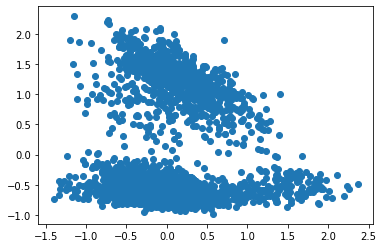

In [15]:
import matplotlib.pyplot as plt

plt.scatter(Y_test-Y_pred,Y_pred)

plt.show()

In [25]:
test_stacked

,Full Regression seq_32x1_16,Full Regression seq_64x1_16,Full Regression seq_32x2_16,Full Regression seq_32_32,Full Regression seq_32x1_16_filt3,Full Regression seq_emb_32x1_16,Hold out Regression seq_32x1_16,Hold out Regression seq_64x1_16,Hold out Regression seq_32x2_16,Hold out Regression seq_32_32,Hold out Regression seq_32x1_16_filt3,Hold out Regression seq_emb_32x1_16,Hold out Top 4% seq_32x1_16,Hold out Top 4% seq_64x1_16,Hold out Top 4% seq_32x2_16,Hold out Top 4% seq_32_32,Hold out Top 4% seq_32x1_16_filt3,Hold out Top 4% seq_emb_32x1_16
0,0.152858,0.214626,0.521663,0.662557,0.323334,0.544112,0.870317,0.169595,0.575787,0.630980,0.069343,0.462867,0.321615,0.258848,0.136507,0.199658,0.361932,0.026322
1,-0.837708,-0.593825,-0.593594,-0.672621,-0.512247,-0.753474,-0.923510,-0.581589,-0.783801,-0.818795,-0.744510,-0.340408,-0.558703,-0.479368,-0.648027,-0.672420,-0.687692,-0.675959
2,-0.698740,-0.887417,-1.067024,-0.735682,-0.675820,-0.781171,-0.952910,-0.849908,-0.940184,-0.907918,-0.914735,-0.862067,-0.822516,-0.908651,-0.961956,-0.744476,-0.896600,-0.753248
3,-0.683392,-0.809385,-0.849784,-0.710825,-0.848222,-0.757604,-1.112680,-1.027327,-0.940184,-0.954406,-1.020236,-0.897221,-0.823418,-0.712708,-0.621578,-0.740152,-0.744285,-0.765109
4,-0.688501,-0.822367,-0.639582,-0.781191,-0.737981,-0.524542,-1.013780,-0.946646,-0.940184,-1.014616,-0.884326,-0.842649,-0.797749,-0.480510,-0.670474,-0.738530,-0.700221,-0.851604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.808285,-0.877257,-0.782713,-0.726461,-0.737846,-0.849832,-0.819350,-0.870621,-0.940184,-0.899732,-0.917757,-0.915209,-0.726256,-0.873031,-0.747512,-0.727670,-0.771327,-0.744879
4996,-0.737270,-0.867826,-1.029905,-0.729373,-0.735082,-0.660834,-1.073284,-1.064861,-0.940184,-1.019221,-1.031289,-1.015649,-0.869940,-0.774447,-0.576639,-0.753968,-0.870847,-0.850832
4997,-0.808658,-0.830550,-1.108424,-0.705319,-0.665687,-0.851642,-0.869661,-0.844722,-0.940184,-0.793137,-0.941736,-1.120676,-0.611164,-0.780714,-0.635583,-0.674550,-0.821652,-0.726111
4998,0.831788,1.107212,0.977303,1.139434,0.631791,0.910033,0.931938,0.508772,1.091320,1.358514,1.211492,0.512324,0.542878,0.475522,0.435539,0.189948,0.688104,0.274856


In [ ]:
test_label

array([-0.66833149, -0.38309577, -0.94453791, ..., -0.69936573,
        1.31478714, -0.53799773])

In [ ]:
model = Sequential()
model.add(Input(shape=(18,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

result = model.fit(x=stacked_dataset.values, y=test_label, batch_size=100, epochs=10)

Epoch 1/10
227/227 [==============================] - 1s 2ms/step - loss: 0.3062 - mse: 0.3062
Epoch 2/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1925 - mse: 0.1925
Epoch 3/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1817 - mse: 0.1817
Epoch 4/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1759 - mse: 0.1759
Epoch 5/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1725 - mse: 0.1725
Epoch 6/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1701 - mse: 0.1701
Epoch 7/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1684 - mse: 0.1684
Epoch 8/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1671 - mse: 0.1671
Epoch 9/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1662 - mse: 0.1662
Epoch 10/10
227/227 [==============================] - 1s 2ms/step - loss: 0.1655 - mse: 0.1655


In [ ]:
model.save('./weights/interpret/Hold out Regression/interpret_15x1')

INFO:tensorflow:Assets written to: ./weights/interpret/Hold out Regression/interpret_15x1/assets


INFO:tensorflow:Assets written to: ./weights/interpret/Hold out Regression/interpret_15x1/assets


In [ ]:
y_pred

array([[-0.5746421 ],
       [-0.53641164],
       [-0.6077979 ],
       ...,
       [-0.6919606 ],
       [ 1.4835632 ],
       [-0.612503  ]], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(stacked_dataset)
r2_score(test_label, y_pred)

0.7586567382008899

In [ ]:
model = Sequential()
model.add(Input(shape=(18,)))
model.add(Dense(10, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(15, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(10, activation=LeakyReLU(alpha=0.3)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

result = model.fit(x=stacked_dataset.values, y=test_label, batch_size=100, epochs=10)

Epoch 1/10
227/227 [==============================] - 1s 3ms/step - loss: 0.6316 - mse: 0.6316
Epoch 2/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5350 - mse: 0.5350
Epoch 3/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5303 - mse: 0.5303
Epoch 4/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5283 - mse: 0.5283
Epoch 5/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5273 - mse: 0.5273
Epoch 6/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5268 - mse: 0.5268
Epoch 7/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5266 - mse: 0.5266
Epoch 8/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5264 - mse: 0.5264
Epoch 9/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5263 - mse: 0.5263
Epoch 10/10
227/227 [==============================] - 1s 3ms/step - loss: 0.5263 - mse: 0.5263


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(stacked_dataset)
r2_score(test_label, y_pred)

0.23075103308992873